# Week 3

In [105]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

### Degree Centrality

Identifies the most importante nodes in a network
- Directed network: degree
- Undirected network: in-degree and/or out-degree

Directed Network: 

```Centrailty(node) = degree(v) / (|all nodes| - 1)```

```0 <= Centrality <= 1```

###### # Example 1

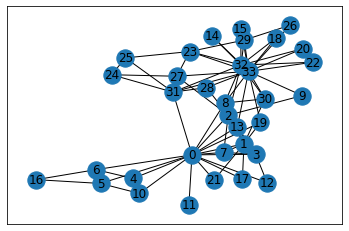

In [2]:
g = nx.karate_club_graph()
nx.draw_networkx(g)

In [3]:
g = nx.convert_node_labels_to_integers(g, first_label=1)

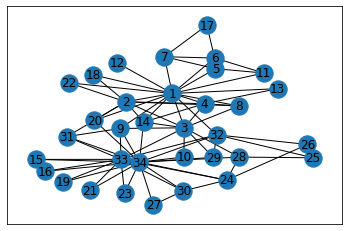

In [4]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [5]:
nx.center(g)

[1, 2, 3, 4, 9, 14, 20, 32]

In [9]:
dict(nx.degree(g))

{1: 16,
 2: 9,
 3: 10,
 4: 6,
 5: 3,
 6: 4,
 7: 4,
 8: 4,
 9: 5,
 10: 2,
 11: 3,
 12: 1,
 13: 2,
 14: 5,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 2,
 20: 3,
 21: 2,
 22: 2,
 23: 2,
 24: 5,
 25: 3,
 26: 3,
 27: 2,
 28: 4,
 29: 3,
 30: 4,
 31: 4,
 32: 6,
 33: 12,
 34: 17}

In [6]:
nx.degree_centrality(g)[34] # 17/(34-1) | use formula

0.5151515151515151

In [7]:
nx.degree_centrality(g)[33] # 12/(34-1) | use formula

0.36363636363636365

###### # Example 2

In [10]:
gd = nx.MultiDiGraph()

In [11]:
e = [
        ('A', 'B'), ('A', 'E'), ('A', 'N'),
        ('B', 'C'), ('B', 'E'),
        ('C', 'A'), ('C', 'D'),
        ('D', 'B'), ('D', 'E'),
        ('E', 'D'), ('E', 'C'),
        ('F', 'G'),
        ('G', 'A'), ('G', 'J'),
        ('H', 'G'), ('H', 'I'),
        ('I', 'G'), ('I', 'F'), ('I', 'J'),
        ('J', 'F'), ('J', 'O'),
        ('K', 'L'), ('K', 'M'),
        ('L', 'M'),
        ('N', 'L'), ('N', 'O'),
        ('O', 'K'), ('O', 'L'),('O','J')
    ]

In [12]:
gd.add_edges_from(e)
gd

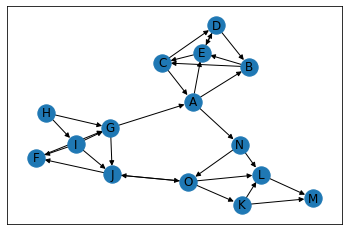

In [13]:
pos = nx.kamada_kawai_layout(gd)
nx.draw_networkx(gd, pos)

In [14]:
# IN-degree
i = nx.in_degree_centrality(gd)
# OUT-degree
o = nx.out_degree_centrality(gd)

In [18]:
nx.in_degree_centrality(gd)['A'] # 2/33

0.14285714285714285

In [17]:
nx.out_degree_centrality(gd)['A'] # 3/33

0.21428571428571427

In [ ]:
i['A'], o['A']

(0.14285714285714285, 0.21428571428571427)

### Closenesse Centrality

Nodes that are important, will be close to other nodes

![closeness centrality](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/ccentrality.png?raw=1)

###### # Example 3

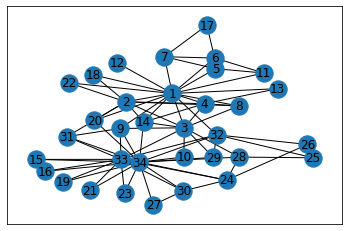

In [19]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [22]:
cc = nx.closeness_centrality(g) 

In [25]:
cc[32] # from 32 to reach the center what is the distance

0.5409836065573771

In [27]:
sum(nx.shortest_path_length(g, 32).values()) # finding path length

61

In [28]:
nx.shortest_path_length(g,32)

{1: 1,
 2: 2,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 17: 3,
 18: 2,
 19: 2,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 24: 2,
 25: 1,
 26: 1,
 27: 2,
 28: 2,
 29: 1,
 30: 2,
 31: 2,
 32: 0,
 33: 1,
 34: 1}

In [35]:
nx.shortest_path(g,23)

{1: [23, 33, 3, 1],
 2: [23, 33, 3, 2],
 3: [23, 33, 3],
 4: [23, 33, 3, 4],
 5: [23, 33, 3, 1, 5],
 6: [23, 33, 3, 1, 6],
 7: [23, 33, 3, 1, 7],
 8: [23, 33, 3, 8],
 9: [23, 33, 9],
 10: [23, 34, 10],
 11: [23, 33, 3, 1, 11],
 12: [23, 33, 3, 1, 12],
 13: [23, 33, 3, 1, 13],
 14: [23, 34, 14],
 15: [23, 33, 15],
 16: [23, 33, 16],
 17: [23, 33, 3, 1, 6, 17],
 18: [23, 33, 3, 1, 18],
 19: [23, 33, 19],
 20: [23, 34, 20],
 21: [23, 33, 21],
 22: [23, 33, 3, 1, 22],
 23: [23],
 24: [23, 33, 24],
 25: [23, 33, 32, 25],
 26: [23, 33, 24, 26],
 27: [23, 34, 27],
 28: [23, 34, 28],
 29: [23, 34, 29],
 30: [23, 33, 30],
 31: [23, 33, 31],
 32: [23, 33, 32],
 33: [23, 33],
 34: [23, 34]}

In [30]:
nx.closeness_centrality(g)[23] # 

0.3707865168539326

###### # Example 4

![disconnected](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/disconnected.png?raw=1)

In [36]:
nx.closeness_centrality(gd)

{'A': 0.32010582010582006,
 'B': 0.2700892857142857,
 'C': 0.2216117216117216,
 'D': 0.2216117216117216,
 'E': 0.27880184331797236,
 'F': 0.2216117216117216,
 'G': 0.19206349206349205,
 'H': 0.0,
 'I': 0.07142857142857142,
 'J': 0.2700892857142857,
 'K': 0.24489795918367344,
 'L': 0.32625482625482627,
 'M': 0.28,
 'N': 0.26190476190476186,
 'O': 0.28809523809523807}

![disconnected2](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/disconnected2.png?raw=1)

The nx.closeness_centrality() method is already normalized by

```( (n-1) / (|G|-1) )```

*There's **no** need to do it manually, like in the lecture!*

In [39]:
nx.closeness_centrality(gd)['L'] # 1/14(1/1)

0.32625482625482627

### Betweenness Centrality

A node 'n' has high Betweenness Centrality if it appears a great number of times in the shortest paths between nodes 'u' and 'v'

![betweennes centrality](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/beecentrality.png?raw=1)

Note that we can either **include** or **exclude** the node 'v' as an **endpoint**

![betweennes centrality 2](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/beecentrality02.png?raw=1)

We consider Betweenness Centrality only for nodes who can be reached

###### # Example 5

In [45]:
g_noD = nx.DiGraph()

In [46]:
g_noD.add_edges_from([
    
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'A'),
    ('D', 'B'),
    ('D', 'C')
    
])

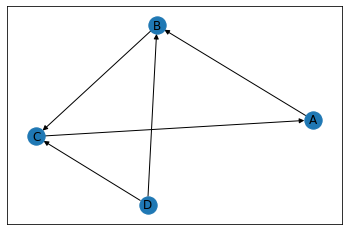

In [47]:
pos = nx.kamada_kawai_layout(g_noD)
nx.draw_networkx(g_noD, pos)

If we calculate the BetCentrality for node 'D', it would have us dividing by zero. Hence, we assume it as undefined.

In [51]:
nx.betweenness_centrality(g_noD)

{'A': 0.16666666666666666,
 'B': 0.16666666666666666,
 'C': 0.3333333333333333,
 'D': 0.0}

###### # Example 6

In [52]:
g = nx.Graph()

In [53]:
g.add_edges_from(
    [
        ('A', 'B'), ('A', 'C'),
        ('B', 'C'),
        ('C', 'D'),
        ('D', 'E'),
        ('E', 'F'), ('E', 'G'),
        ('F', 'G')
    ]
)

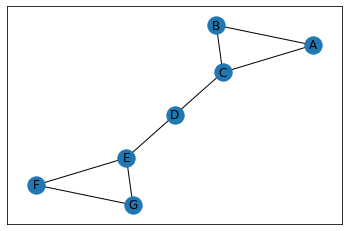

In [54]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [56]:
bcc = nx.betweenness_centrality(G=g, endpoints=False) # no endpoint | 
bcc

{'A': 0.0,
 'B': 0.0,
 'C': 0.5333333333333333,
 'D': 0.6,
 'E': 0.5333333333333333,
 'F': 0.0,
 'G': 0.0}

In [57]:
def maxKeyVal(x: dict):
    keys = list(x.keys())
    values = list(x.values())
    return keys[values.index(max(values))], max(list(x.values()))

def minKeyVal(x: dict):
    keys = list(x.keys())
    values = list(x.values())
    return keys[values.index(min(values))], min(list(x.values()))

In [58]:
maxKeyVal(bcc), minKeyVal(bcc)

(('D', 0.6), ('A', 0.0))

Normalization: BetCentrality values will be larger in graphs with many nodes.

- Undirected Graphs:
    
    ```1/2 * ((|N| - 1) * (|N| - 2))```

- Directed Graphs
    
    ```(|N| - 1) * (|N| - 2)```
    
nx.betweenness_centrality() method already has a 'normalized' parameter, True as default

###### # Example 7

Betweeness Centrality can be cost intensive

```O(|N|³)```

which leads us to calculate it using samples from the graph

In [59]:
g = nx.karate_club_graph()

In [60]:
g = nx.convert_node_labels_to_integers(g, first_label=1)

In [74]:
betCentrality = nx.betweenness_centrality(G=g, normalized=True, endpoints=False) # endpoint false undirected graph
betCentrality

{1: 0.43763528138528146,
 2: 0.053936688311688304,
 3: 0.14365680615680618,
 4: 0.011909271284271283,
 5: 0.0006313131313131313,
 6: 0.02998737373737374,
 7: 0.029987373737373736,
 8: 0.0,
 9: 0.05592682780182781,
 10: 0.0008477633477633478,
 11: 0.0006313131313131313,
 12: 0.0,
 13: 0.0,
 14: 0.04586339586339586,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.03247504810004811,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.017613636363636363,
 25: 0.0022095959595959595,
 26: 0.0038404882154882154,
 27: 0.0,
 28: 0.02233345358345358,
 29: 0.0017947330447330447,
 30: 0.0029220779220779218,
 31: 0.014411976911976909,
 32: 0.13827561327561325,
 33: 0.145247113997114,
 34: 0.30407497594997596}

In [77]:
# Using (k = 10) samples
betCentrality_approx = nx.betweenness_centrality(G=g, normalized=True, endpoints=False, k=10)
betCentrality_approx

{1: 0.4542430254930255,
 2: 0.09056547619047617,
 3: 0.16090818903318901,
 4: 0.009531325156325156,
 5: 0.0,
 6: 0.012878787878787878,
 7: 0.01824494949494949,
 8: 0.0,
 9: 0.05688897907647907,
 10: 0.0011192279942279942,
 11: 0.0021464646464646464,
 12: 0.0,
 13: 0.0,
 14: 0.0383578342953343,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.030748106060606063,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.009337121212121212,
 25: 0.0,
 26: 0.003183922558922559,
 27: 0.0,
 28: 0.03971981721981722,
 29: 0.0011192279942279942,
 30: 0.005182178932178931,
 31: 0.010226370851370849,
 32: 0.15275417869167868,
 33: 0.11540824915824914,
 34: 0.35220929533429535}

In [78]:
from operator import itemgetter

In [79]:
# top 5 from bet
sorted(betCentrality.items(), key=itemgetter(1), reverse=True)[:6]

[(1, 0.43763528138528146),
 (34, 0.30407497594997596),
 (33, 0.145247113997114),
 (3, 0.14365680615680618),
 (32, 0.13827561327561325),
 (9, 0.05592682780182781)]

In [81]:
# top 5 from betCentrality_approx
sorted(betCentrality_approx.items(), key=itemgetter(1), reverse=True)[:6]

[(1, 0.4542430254930255),
 (34, 0.35220929533429535),
 (3, 0.16090818903318901),
 (32, 0.15275417869167868),
 (33, 0.11540824915824914),
 (2, 0.09056547619047617)]

###### # Example 8

Compute the BetCentrality between two groups, source and target groups

In [82]:
s_nodes = [34, 33, 21, 30, 16, 27, 15, 23, 10]
t_nodes = [1, 4, 13, 11, 6, 12, 17, 7]

In [83]:
betCen_subset = nx.betweenness_centrality_subset(G=g,
                                                sources=s_nodes,
                                                targets=t_nodes,
                                                normalized=True)

In [84]:
# top 5 from betCen_subset
sorted(betCen_subset.items(), key=itemgetter(1), reverse=True)[:6]

[(1, 0.04899515993265994),
 (34, 0.028807419432419434),
 (3, 0.018368205868205867),
 (33, 0.01664712602212602),
 (9, 0.014519450456950456),
 (32, 0.014519450456950456)]

###### # Example 9

Use BetCentrality to find imoprtant edges

In [69]:
betCen_edges = nx.edge_betweenness_centrality(G=g, normalized=True)

In [70]:
# top 5 from betCen_edges
sorted(betCen_edges.items(), key=itemgetter(1), reverse=True)[:6]

[((1, 32), 0.1272599949070537),
 ((1, 7), 0.07813428401663695),
 ((1, 6), 0.07813428401663694),
 ((1, 3), 0.0777876807288572),
 ((1, 9), 0.07423959482783014),
 ((3, 33), 0.06898678663384543)]

Compute the BetCentrality between two edges groups, source and target groups

In [71]:
betCen_edges_subset = nx.edge_betweenness_centrality_subset(G=g,
                                                            sources=s_nodes,
                                                            targets=t_nodes,
                                                            normalized=True)

In [ ]:
# top 5 from betCen_edges_subset
sorted(betCen_edges_subset.items(), key=itemgetter(1), reverse=True)[:6]

[((1, 9), 0.01366536513595337),
 ((1, 32), 0.01366536513595337),
 ((14, 34), 0.012207509266332794),
 ((1, 3), 0.01211343123107829),
 ((1, 6), 0.012032085561497326),
 ((1, 7), 0.012032085561497326)]

#

In [ ]:
# shoud have done it before...

from operator import itemgetter

def orderDict(x: dict, desc=True):
    return sorted(x.items(), key=itemgetter(1), reverse=desc)

#

### Page Rank

###### *(Best applied for Directed Networks)*

Suppose we have a network with n nodes

Each node will have a rank of ```1/n```. That implies that the ```sum()``` of all ranks is always equal to ```1```

Then, perform the ```PageRank Update Rule``` k times

PageRank Update Rule:

    Each node gives an equal share of its current PageRank to all the nodes to
    whom it is linked

###### # Example 10

Performing PageRake Update Rule for k = 2

![pageRank for k = 2](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/pageRankUpdateKIs2_01.png?raw=1)

![pageRank for k = 2](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/pageRankUpdateKIs2_02.png?raw=1)

![pageRank for k = 2](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/pageRankUpdateKIs2_03.png?raw=1)

If we continue increasing value of ```k```, usually, values start to converge and stabilize

![pageRank for k = 2](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/pageRankUpdateKIs2_04.png?raw=1)

### Scaled Page Rank

Random Walk of k steps:

```Start on a random node, then choose an outgoing edge at random an follow it to the next node; repeat k times.```

In [ ]:
# The graph from the picture above
g = nx.DiGraph()

In [ ]:
g.add_edges_from([
    ('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'B'), 
    ('D', 'A'), ('D', 'C'), ('D', 'E'), ('E', 'A'), 
])

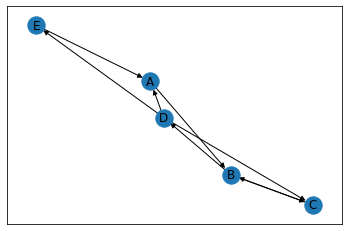

In [ ]:
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos)

We can interpreter a PageRank value as the probability of landing on a node (*page*) after ```k``` steps. Hence, the probability of landing on node 'B' at the end of a random walk is higher

###### # Example 11

In [ ]:
g_new = g.copy()

In [ ]:
# g with new nodes 'F', 'G', and new edges
g_new.add_edges_from([('B', 'F'), ('B', 'G'), ('F', 'G'), ('G', 'F')])

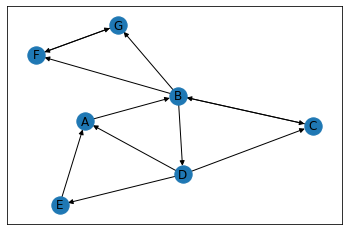

In [ ]:
pos = nx.spring_layout(g_new)
nx.draw_networkx(g_new, pos)

Random walks will probably land on nodes 'F' or 'G', since either of them is only connected to each other

We add a damping parameter ```alfa```. Changing the behaviour of our Random Walk:

- Start a node 'v', then:
    - With probabilty ```alfa```: choose an outgoing edge and follow it to the next node;
    - With probabilty ```1 - alfa```: choose a random node and jump directly to it;
    - Repeat ```k```times

Now we have a way out to not be locked on nodes 'F' or 'G'

In [ ]:
# Simple PageRank
pr_g = nx.pagerank(g)

In [ ]:
# PageRank for g_new
# nx.pagerank() already has a standard alpha parameter of 0.85
pr_gnew = nx.pagerank(g_new)

In [ ]:
# but we can change it
pr_gnew_a = nx.pagerank(G=g_new, alpha=0.9)

In [ ]:
orderDict(pr_g)

[('B', 0.35519316255962574),
 ('C', 0.23222770978534224),
 ('D', 0.18095642215666963),
 ('A', 0.15035141786968964),
 ('E', 0.08127128762867263)]

In [ ]:
orderDict(pr_gnew)

[('G', 0.3280507927524911),
 ('F', 0.328050792752491),
 ('B', 0.13072972919003595),
 ('A', 0.06543693487722958),
 ('C', 0.06315158949959035),
 ('D', 0.04920893254397847),
 ('E', 0.03537122838418331)]

In [ ]:
orderDict(pr_gnew_a)

[('F', 0.37011515621714647),
 ('G', 0.3701151562171464),
 ('B', 0.10100891814607932),
 ('A', 0.04824078073043102),
 ('C', 0.04811713720174119),
 ('D', 0.03701306787128782),
 ('E', 0.02538978361616765)]

### Hubs and Authorities

- Root: Set of highly relevant web pages. Potential authorities;

- Base: Root nodes and any node that links to a node in root;

- Hubs: Nodes that are not our target, but link to those who are;

- Authorities: Interest node(s)

"Hubs estimates the node value based on *outgoing links*

Authorities estimates the node value based on the *incoming links*"

Consider all the edges connecting nodes in the base set

![base](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/base.png?raw=1)

Instead of calculating the PageRank for all nodes in the network, we begin with a subset of the network, trying to work with possible strong candidates

###### # Example 12

HITS Algorithm:

- Assign each node an ```Authtority & Hub Score``` of ```1```;

- Apply the Authority Update Rule:
    - Each node's authority score is the sum of ```hub scores```of each node that **points to it**
    
- Apply the Hub Update Rule:
    - Each node's hub score is the sum of ```authority scores``` of each node that **it points to**
    
- Normalize Authority and Hub scores:
    - ```auth(j) = auth(j) / sum(auth(i))```
    - ```hub(j) = hub(j) / sum(hub(i))```

- Repeat ```k``` times

In [94]:
g = nx.DiGraph()

In [95]:
g.add_edges_from(
    [
        ('A', 'D'),
        ('B', 'C'), ('B', 'E'),
        ('C', 'A'),
        ('D', 'B'), ('D', 'C'),
        ('E', 'B'), ('E', 'C'), ('E', 'D'), ('E', 'F'),
        ('F', 'C'), ('F', 'H'),
        ('G', 'C'), ('G', 'A'),
        ('H', 'A')
    ]
)

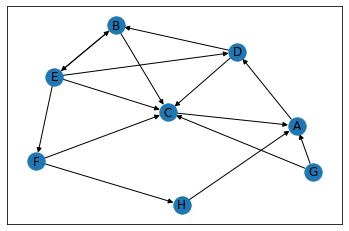

In [96]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

![hits_01](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/hits01.png?raw=1)

![hits_02](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/hits02.png?raw=1)

![hits_03](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/hits03.png?raw=1)

![hits_04](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/hits04.png?raw=1)

For most networks, as ```k``` grows, the authority and hub scores do converge to a unique value 

![hits_05](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%203/media/hits05.png?raw=1)

In [106]:
hub, autr = nx.hits(g)

In [111]:
from collections import OrderedDict
collections.OrderedDict(autr)
#orderDict(autr)[:3]

OrderedDict([('A', 0.08751958702900828),
             ('D', 0.12768284011810246),
             ('B', 0.187045741693978),
             ('C', 0.3690360954887362),
             ('E', 0.05936290157587561),
             ('F', 0.10998993251842382),
             ('H', 0.05936290157587558),
             ('G', 0.0)])

In [113]:
orderDict(hub)[:3]
#collections.OrderedDict(autr)[:3]


TypeError: ignored

Nodes that have:
- **incoming** edges from ```good hubs``` are ```good authorities```
- **outgoing** edges to ```good authorities``` are ```good hubs```

### Comparing Centrality Measures

###### # Example 13

In [114]:
g = nx.MultiDiGraph()
g.add_edges_from([
        ('1', '2'), ('1', '5'),
        ('2', '1'), ('2', '3'), ('2', '4'), 
        ('3', '1'), ('3', '2'), ('3', '4'), 
        ('4', '1'), ('4', '3'), 
        ('5', '1'), ('5', '6'), 
        ('6', '7'), ('6', '5'), 
        ('7', '6'), ('7', '8'), ('7', '9'), 
        ('8', '6'), ('8', '7'), ('8', '9'), 
        ('9', '6'), ('9', '8'), 
    ])

g

In [115]:
indg = orderDict(nx.in_degree_centrality(g))

In [116]:
ccen = orderDict(nx.closeness_centrality(g))

In [130]:
betcen = orderDict(nx.betweenness_centrality(g)) # it can only be implement on indirected graph

NetworkXNotImplemented: ignored

In [120]:
g_single = nx.Graph(g.to_undirected())

In [121]:
pgrk = orderDict(nx.pagerank(g_single))

In [122]:
hubs, autr = nx.hits(g_single)

hubs = orderDict(hubs)
autr = orderDict(autr)

In [123]:
import pandas as pd

In [124]:
col_names = ['in-degree', 'closeness', 'betweness', 'page rank', 'autr', 'hubs']

In [125]:
df = pd.DataFrame(columns=col_names)

In [129]:
df['in-degree'] = [n for n, v in indg]
df['closeness'] = [n for n, v in ccen]
#df['betweness'] = [n for n, v in betcen]
df['page rank'] = [n for n, v in pgrk]
df['autr'] = [n for n, v in autr]
df['hubs'] = [n for n, v in hubs]

ValueError: ignored

In [131]:
df

,in-degree,closeness,betweness,page rank,autr,hubs


EOF